# Questão 1

Para resolver a questão 1 nos pensamos em primeiro descobrir qual equação nos daria melhor aproximação para o valor desejado, usando a formula de resfriamento de newton que segue a seguir: $$T=(T_0-T_f)*e^{-kt}+T_f$$ Onde 

$T_0 - \text{Temperatura inicial do objeto}$

$T_f - \text{Temperatura final do objeto, ao atingir o equilíbrio}$

$k - \text{É uma constante determinada}$

$t - \text{O tempo passado}$

$T - \text{Temperatura no instante t}$

Pelo enunciado temos que $T_0=34º \text{ e } T_f=20º$, T é determinado pelo tempo t, e k teremos que descobrir, assim temos provisoriamente:
$$
T=(34-20)e^{-kt}+20 \therefore T=14e^{-kt}+20 
$$
Usando o enunciado temos 3 tempos distintos que nos dará 3 temperaturas distintas, que são esses pontos que seguiram a ordem $P_i=(t,T)$, assim teremos $P_0=(0,34),P_1=(90,30),P_2=(150,25)$,Criando os valores desses vetores abaixo e colocamos eles num gráfico teremos
$\{\}$

In [2]:
tempos = [0;90;150]

3-element Vector{Int64}:
   0
  90
 150

In [3]:
temperaturas = [34,30,25]

3-element Vector{Int64}:
 34
 30
 25

In [4]:
using LinearAlgebra
using Plots


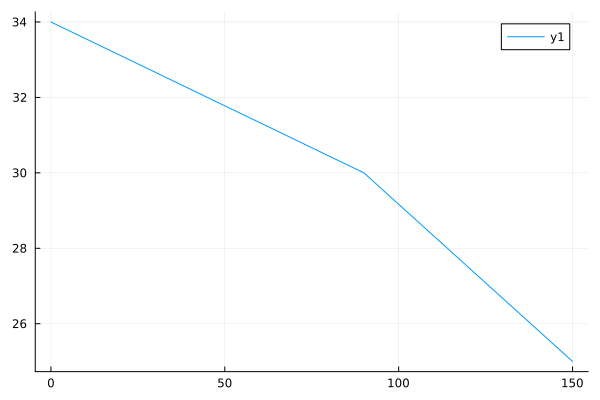

In [5]:
plot(tempos,temperaturas)

Trouxemos as ferramentas que irá nos ajudar a resolver o problema de aproximação para assim pode descobrir a hora que o cadáver morreu, para isso iremos descobrir com quais equações estamos trabalho para encontrar o valor de k necessário, assim substituiremos os pontos descritos acima na formula obtendo as seguintes equações:
$$
34=14e^{-k*0}+20 \to 34=14+20
$$
Esta equação em si não nos disse muita coisa então partiremos para as próximas
$$
30=14e^{-k*90}+20 \to 10/14=e^{-90k} \to \ln{\bigg(\cfrac{10}{14}\bigg)}=-90k
$$

Usando a mesma lógica para a outra teremos:
$$
25=14e^{-k*150}+20 \to 5/14=e^{-150k} \to \ln{\bigg(\cfrac{5}{14}\bigg)}=-150k
$$

Assim temos 2 valores possíveis para k, vamos encontrar aquele que melhor ser aproxima do valor que esperamos, assim teremos o seguinte sistema

$$
\begin{alignat}{2}
   -90k=\ln{\bigg(\cfrac{10}{14}\bigg)}\\
   -150k=\ln{\bigg(\cfrac{5}{14}\bigg)}
\end{alignat}

OU
\begin{bmatrix}
-90\\
-150
\end{bmatrix}
\cdot
\begin{bmatrix}
k\\
\end{bmatrix}

=
\begin{bmatrix}
\ln{\bigg(\cfrac{10}{14}\bigg)}\\
\ln{\bigg(\cfrac{5}{14}\bigg)}
\end{bmatrix}
$$
Ao transformar em códigos para poder executar as operações teremos abaixo os seguintes resultados.

Por fim, executamos mínimos quadrados por meio do $\backslash$ e descobrimos o k que melhor aproxima o nosso problema. 

In [6]:
tempos =[-90;-150]
results = [log(10/14);log(5/14)]
k = tempos\results

0.006036778231146499

Ao fazer a solução do sistema encontramos o valor de k logo abaixo:

In [7]:
println(k)

0.006036778231146499


O valor do erro da aproximação pode ser calculado conforme a célula abaixo:

In [8]:
norm((tempos * x) - results)

UndefVarError: UndefVarError: x not defined

Aqui criamos uma função que aplica a formula de newton para o k que achamos, e fizemos uns teste abaixo e podemos ver que ela aproxima relativamente bem para aquele k:

In [9]:
function resultadoTempoTemperatura(tempo,k)
    return 14*exp(-(tempos\results) * tempo) + 20
end

resultadoTempoTemperatura (generic function with 1 method)

In [10]:
println(resultadoTempoTemperatura(0,k))
println(resultadoTempoTemperatura(90,k))
print(resultadoTempoTemperatura(150,k))

34.0
28.131515290696022
25.660660575986327

Por fim fizemos o calculo da função que recebe a temperatura desejada e retorna o tempo passado para atingir a mesma

In [11]:
function resultadoTemperaturaTempo(temperatura,k)
    return (log(14/(temperatura-20))/k)
end


resultadoTemperaturaTempo (generic function with 1 method)

In [12]:
resultadoTemperaturaTempo(37,k)

-32.16219099108492

Aqui nos podemos ver que obtivemos o valor de aproximadamente -32 minutos, o que teoricamente não faz muito sentido, contudo tendo em vista que utilizamos a temperatura do tempo de encontro do corpo como $T_0$, e não a temperatura inicial de fato, o tempo utilizado também não era o inicial de fato, por isso nos devemos considerar o tempo inicial como aquele de quando a temperatura era de 34º, que no caso são 15:00, subtrando os aproximados 32 minutos teriamos, 14:28 seria o tempo de morte da vítima.

# Questão 2


In [13]:
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [14]:
function regressão(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c
end

regressão (generic function with 1 method)

In [15]:
function polinomio(c,xs)
    s = 0
    tam = size(c,1)
    for i=1:tam
        s = s + (c[i] * xs^(i-1))
    end
    return s
end

polinomio (generic function with 1 method)

In [16]:
xs = randn(31)
ys = Float64[]
cs=[]
erros = []
is = []
for i=1:31
    s=0
    s+= 1+2*xs[i] + 3*xs[i]^2 +4*xs[i]^3 + 5*xs[i]^4+ 6*xs[i]^5
    push!(ys,s)
end
xs
for i=1:31
    c = regressão(xs,ys,i)
    push!(cs, c)
end

for i=1:31
    push!(is, i)
    s=0
    for j=1:31
       s= s+  (ys[j] - polinomio(cs[i],xs[j]))^2
    end
    push!(erros, sqrt(s))
end



In [17]:
A = zeros(30,5)
xs = randn(30)
ys = randn(30)
ys1 = []
is = []
erro = zeros(30,1)

cs = []
result = []

for i=0:29

    c = regressão(xs,ys,i)
    push!(cs, c)
    push!(is, i)
end

for i=1:30
    for j=1:30
        erro[i] = erro[i] + (ys[j] - polinomio(cs[i],xs[j]))^2
    end
    erro[i] = sqrt(erro[i])
end
scatter(is, erro, c=:lightblue, ms=3, leg=false)
erro


30×1 Matrix{Float64}:
  4.41098149843853
  4.3085396744255355
  3.9832078702403027
  3.9827739294259548
  3.903675247850382
  3.8917931522358136
  3.8565868343543563
  3.8545853462926187
  3.825363911432373
  3.8052127253780723
  ⋮
  2.841663150867038
  2.8436477898330734
  2.8407227508215347
  2.816181031826066
  2.8907085345771684
  2.9345449099514216
  3.0408046975767427
  3.239263233158607
 45.98278450887964

# Questão 3


In [18]:
filmes = ["Toy Story", "Rocky", "De volta pro futuro", 
"Curtindo a vida adoidado", "Os Incriveis", "Duna", "Batman begins", "Harry Potter", "Shrek"]

matriz_filmes = zeros(9,9)
matriz_filmes[1,2] = 12
matriz_filmes[2,1] = 1/12
matriz_filmes[3,4] = 8/5
matriz_filmes[4,3] = 5/8
matriz_filmes[5,6] = 10/3
matriz_filmes[6,5] = 3/10
matriz_filmes[7,8] = 7/5
matriz_filmes[8,7] = 5/7
matriz_filmes[9,6] = 11/2
matriz_filmes[6,9] = 2/11
matriz_filmes[8,2] = 10/3
matriz_filmes[2,8] = 3/10
matriz_filmes[1,3] = 9/4
matriz_filmes[3,1] = 4/9
matriz_filmes[5,8] = 9/4
matriz_filmes[8,5] = 4/9
matriz_filmes[4,6] = 7/5
matriz_filmes[6,4] = 5/7
matriz_filmes[3,6] = 7/5
matriz_filmes[6,3] = 5/7
matriz_filmes[9,2] = 12/1
matriz_filmes[2,9] = 1/12
matriz_filmes[5,7] = 9/4
matriz_filmes[7,5] = 4/9
matriz_filmes[1,7] = 8/5
matriz_filmes[7,1] = 5/8
matriz_filmes[5,4] = 10/3
matriz_filmes[5,4] = 3/10
filmes = []
for i=1:9
    linha=0
    naonulos=0
    for j=1:9
        if matriz_filmes[i,j]!=0
            linha+=matriz_filmes[i,j]
            naonulos+=1
        end

    end
    push!(filmes , linha/naonulos)
end
filmes


9-element Vector{Any}:
 5.283333333333333
 0.15555555555555553
 1.1481481481481481
 1.0125
 2.033333333333333
 0.47759740259740263
 0.8231481481481481
 1.4973544973544974
 8.75

# Questão 4

In [32]:

using CurveFit
pesagem = [ 120.6, 121.6, 120.8, 121.4, 121.1, 121.1, 120.4, 120.3, 120.8, 120.6, 119.6, 119.8, 118.7, 120.5, 120.1, 120.2, 120.7, 121.7, 120.7, 120.7, 120.3, 119.4, 119.1, 120.2, 120.7, 120.1, 119.7, 119.2, 119.4, 119.5, 119, 118.9, 118.7, 118.3, 118.5, 118.6, 118.8, 118.5, 118.3, 117.8, 118, 119, 118.4, 116.9, 117.5, 117.4, 117.6, 118.1, 117.3, 117.6, 117.7, 117.6, 117.3, 118, 117.8, 117.5, 119, 117.6, 116.8, 116.6, 116.9, 116.1, 116.1, 115.8, 115.6, 116, 115.4, 115.5, 115.3]
dias = [0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83]

function matrix_sen_cos(x,y)
    n,=size(y)
    V=zeros(n,3)
    for i=1:n #linhas
        V[i,1]=sin(2*π*x[i])
        V[i,2]=cos(2*π*x[i])
        V[i,3]=1
    end
    return V
end
c = CurveFit.linear_fit(dias, pesagem)
#constante
V=vandermonde(dias,pesagem,0)
a=regressão(dias,pesagem,0)
constante(dias)=a[1]

#reta
V=vandermonde(dias,pesagem,1)
b=regressão(dias,pesagem,1)
reta(dias)=b[1]+b[2]*dias

dia = (110-b[1])/b[2]  



172.26753579630636